In [79]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'C:\\Users\\Asus\\Desktop\\Blindness_Detection_EfficientNet\\'

In [3]:
df = pd.read_csv(path + 'train.csv', sep=',')

In [4]:
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [5]:
df["diagnosis"].value_counts() 

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [6]:
df["diagnosis"].isnull().sum()

0

<AxesSubplot:ylabel='diagnosis'>

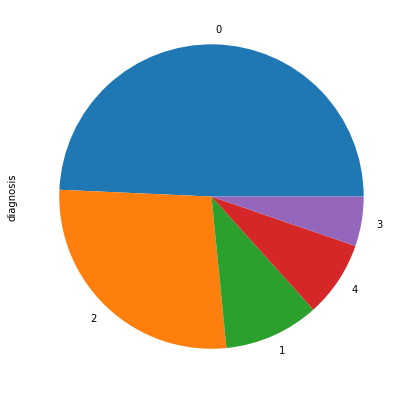

In [7]:
df["diagnosis"].value_counts().plot.pie(figsize=(7, 7))

In [8]:
df = df.sort_values(by = ["id_code"])

In [9]:
images = os.listdir(path + 'train_images')
images[0:10]

['000c1434d8d7.png',
 '001639a390f0.png',
 '0024cdab0c1e.png',
 '002c21358ce6.png',
 '005b95c28852.png',
 '0083ee8054ee.png',
 '0097f532ac9f.png',
 '00a8624548a9.png',
 '00b74780d31d.png',
 '00cb6555d108.png']

In [10]:
len(images)

3662

In [11]:
images_list = []

for img in images:
    image = cv2.imread(path + 'train_images\\' + img)
    image = cv2.resize(image, (512,512))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images_list.append(image)

In [12]:
len(images_list)

3662

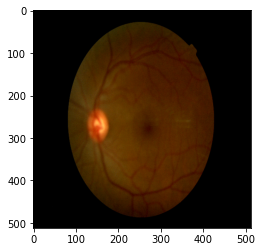

In [13]:
plt.imshow(images_list[4])

In [71]:
preprocess_img = images_list[4].copy()
preprocess_img = cv2.cvtColor(preprocess_img, cv2.COLOR_RGB2GRAY)

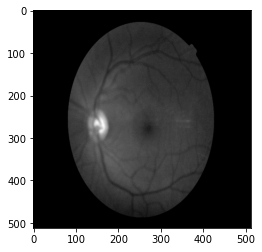

In [72]:
plt.imshow(preprocess_img, cmap='gray')

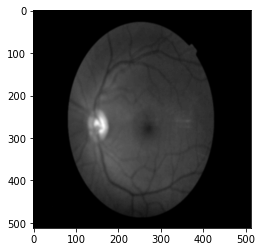

In [73]:
blur = cv2.GaussianBlur(preprocess_img,(5,5),0)
plt.imshow(blur, cmap='gray')

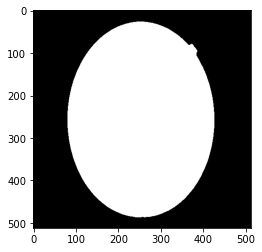

In [30]:
thresh = cv2.threshold(blur,10,255,cv2.THRESH_BINARY)[1] #sadece görüntü
plt.imshow(thresh, cmap='gray')

In [35]:
contour = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0][0]
contour.shape

(1160, 1, 2)

In [36]:
contour = contour[:,0,:]
contour.shape

(1160, 2)

In [55]:
xmax = tuple(contour[contour[:,0].argmax()])[0]

In [56]:
xmin = tuple(contour[contour[:,0].argmin()])[0]

In [65]:
ymax = tuple(contour[contour[:,1].argmax()])[1]

In [66]:
ymin = tuple(contour[contour[:,1].argmin()])[1]

In [67]:
xmin, ymax, xmax, ymin

(81, 486, 425, 27)

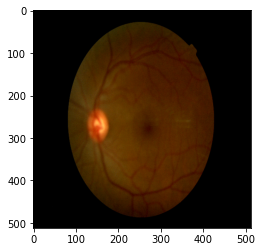

In [68]:
original = images_list[4].copy()
plt.imshow(original)

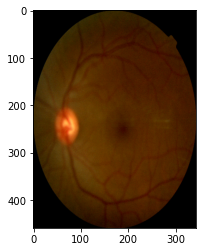

In [69]:
cropped = original[ymin:ymax, xmin:xmax]
plt.imshow(cropped)

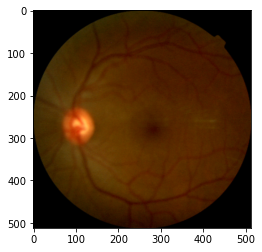

In [70]:
cropped = cv2.resize(cropped,(512,512))
plt.imshow(cropped)

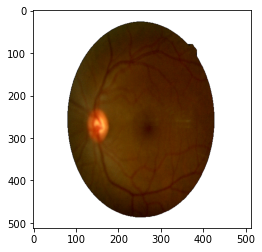

In [94]:
#round cropping
pre = images_list[4].copy()
pre = cv2.cvtColor(pre, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(pre,(5,5),0)
ret, mask = cv2.threshold(blur, 10, 255, cv2.THRESH_BINARY) 
kernel = np.ones((9,9), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

result = images_list[4].copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask
plt.imshow(result)

In [95]:
result.shape

(512, 512, 4)